Must be run in Python 3

In [38]:
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import tensorflow as tf
import sys
import json
import matplotlib.pyplot as plt

In [2]:
wiki_model = Word2Vec.load("english-wikipedia-articles-20170820-models/enwiki_2017_08_20_fasttext.model")

In [3]:
vocab_size = 22000
vector_dim = 100

Input embedding name and path in `compare_embeddings_gender.json` 

In [21]:
!python ../compare-embedding-bias/weat.py ../compare-embedding-bias/configs/compare_embeddings_gender.json bolukbasi_weat.json


Original Embedding
+-------------------------------------------------------+-------+-------+
|                         Test                          | Mean  | Error |
+-------------------------------------------------------+-------+-------+
| Flowers vs Insects (25) / Pleasant vs Unpleasant (25) | 1.333 | 0.04  |
+-------------------------------------------------------+-------+-------+
|   Instruments vs Weapons /  Pleasant vs Unpleasant    | 1.515 | 0.016 |
+-------------------------------------------------------+-------+-------+
|         Male8 vs Female8 /  Career vs Family          | 0.83  | 0.031 |
+-------------------------------------------------------+-------+-------+
|            Math vs Art / Male8 vs Female8             | 0.783 | 0.076 |
+-------------------------------------------------------+-------+-------+
|           Science vs Art / Male8 vs Female8           | 1.115 | 0.079 |
+-------------------------------------------------------+-------+-------+
Bolukbasi
+--------

In [24]:
!python ../compare-embedding-bias/weat.py ../compare-embedding-bias/configs/compare_embeddings_gender.json prob_weat.json

Original Embedding
+-------------------------------------------------------+-------+-------+
|                         Test                          | Mean  | Error |
+-------------------------------------------------------+-------+-------+
| Flowers vs Insects (25) / Pleasant vs Unpleasant (25) | 1.466 | 0.034 |
+-------------------------------------------------------+-------+-------+
|   Instruments vs Weapons /  Pleasant vs Unpleasant    | 1.474 | 0.019 |
+-------------------------------------------------------+-------+-------+
|         Male8 vs Female8 /  Career vs Family          | 0.832 | 0.033 |
+-------------------------------------------------------+-------+-------+
|            Math vs Art / Male8 vs Female8             | 0.778 | 0.076 |
+-------------------------------------------------------+-------+-------+
|           Science vs Art / Male8 vs Female8           | 1.253 | 0.057 |
+-------------------------------------------------------+-------+-------+
Probabilitistic
+--

In [34]:
!python ../compare-embedding-bias/weat.py ../compare-embedding-bias/configs/compare_embeddings_gender.json cluster_weat.json

Original Embedding
+-------------------------------------------------------+-------+-------+
|                         Test                          | Mean  | Error |
+-------------------------------------------------------+-------+-------+
| Flowers vs Insects (25) / Pleasant vs Unpleasant (25) | 1.385 | 0.041 |
+-------------------------------------------------------+-------+-------+
|   Instruments vs Weapons /  Pleasant vs Unpleasant    | 1.507 | 0.018 |
+-------------------------------------------------------+-------+-------+
|         Male8 vs Female8 /  Career vs Family          | 0.85  | 0.032 |
+-------------------------------------------------------+-------+-------+
|            Math vs Art / Male8 vs Female8             | 0.739 | 0.069 |
+-------------------------------------------------------+-------+-------+
|           Science vs Art / Male8 vs Female8           | 1.229 | 0.06  |
+-------------------------------------------------------+-------+-------+
Cluster
+----------

In [22]:
with open('bolukbasi_weat.json', 'r') as f:
    bolukbasi_dict = json.load(f)

In [31]:
with open('prob_weat.json', 'r') as f:
    prob_dict = json.load(f)

In [35]:
with open('cluster_weat.json', 'r') as f:
    cluster_dict = json.load(f)

In [36]:
cluster_dict

{'Original Embedding': {'Flowers vs Insects (25) / Pleasant vs Unpleasant (25)': [1.3847999572753906,
   0.0411],
  'Instruments vs Weapons /  Pleasant vs Unpleasant': [1.5068999528884888,
   0.0184],
  'Male8 vs Female8 /  Career vs Family': [0.8495000004768372, 0.0316],
  'Math vs Art / Male8 vs Female8': [0.7391999959945679, 0.0692],
  'Science vs Art / Male8 vs Female8': [1.2288000583648682, 0.0598]},
 'Cluster': {'Flowers vs Insects (25) / Pleasant vs Unpleasant (25)': [1.059000015258789,
   0.0474],
  'Instruments vs Weapons /  Pleasant vs Unpleasant': [1.4311000108718872,
   0.0174],
  'Male8 vs Female8 /  Career vs Family': [0.17270000278949738, 0.0453],
  'Math vs Art / Male8 vs Female8': [0.09740000218153, 0.0876],
  'Science vs Art / Male8 vs Female8': [0.5235000252723694, 0.0972]}}

In [52]:
vals, err = zip(*[*bolukbasi_dict['Original Embedding'].values()])
vals

(1.3329999446868896,
 1.5153000354766846,
 0.830299973487854,
 0.7833999991416931,
 1.114799976348877)

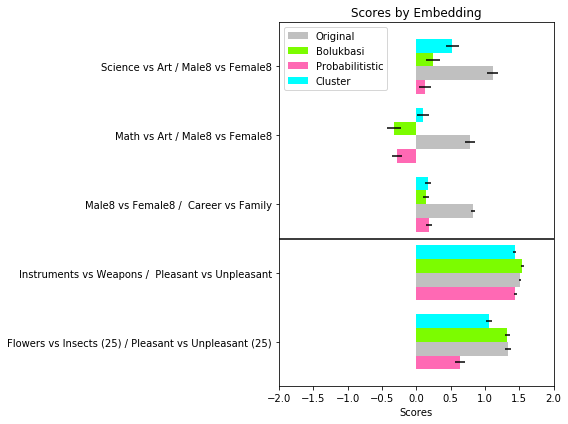

In [88]:
ind = np.arange(len([*bolukbasi_dict['Original Embedding'].keys()]))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
o_vals, o_err = zip(*[*bolukbasi_dict['Original Embedding'].values()])
rects1 = ax.barh(ind - width/2, o_vals, width,xerr=o_err,label='Original', color='silver')

b_vals, b_err = zip(*[*bolukbasi_dict['Bolukbasi'].values()])
rects2 = ax.barh(ind + width/2, b_vals, width, xerr=b_err,label='Bolukbasi',color='lawngreen')

p_vals, p_err = zip(*[*prob_dict['Probabilitistic'].values()])
rects3 = ax.barh(ind - width*(3/2), p_vals, width,xerr=p_err,label='Probabilitistic',color='hotpink')

c_vals, c_err = zip(*[*cluster_dict['Cluster'].values()])
rects4 = ax.barh(ind + width*(3/2), c_vals, width, xerr=c_err,label='Cluster',color='cyan')

ax.set_xlabel('Scores')
ax.set_title('Scores by Embedding')
ax.set_xticks(np.linspace(-2,2,9))
ax.set_yticks(ind)
ax.set_yticklabels([*bolukbasi_dict['Original Embedding'].keys()])
ax.legend()
ax.axhline(1.5,0,1,c='k')

fig.tight_layout()
plt.show()

